### Construction Of Neural Networks

In [2]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from keras import applications
from keras.preprocessing import image
from keras.datasets import mnist
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation

Using TensorFlow backend.


In [3]:
(train_set, train_label), (test_set, test_label) = mnist.load_data()

In [4]:
#Training Set Size, - 60000 images each of 28 x 28
new_train_set = np.expand_dims(train_set, axis=-1)
new_test_set = np.expand_dims(test_set, axis=-1)
print(new_train_set.shape)
print(train_label.shape)
print(new_test_set.shape)
print(test_label.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
#One Hot encoding the label
one_hot_train_label = keras.utils.to_categorical(train_label, 10)
one_hot_test_label = keras.utils.to_categorical(test_label, 10)

In [6]:
print(one_hot_train_label.shape)
print(one_hot_test_label.shape)

(60000, 10)
(10000, 10)


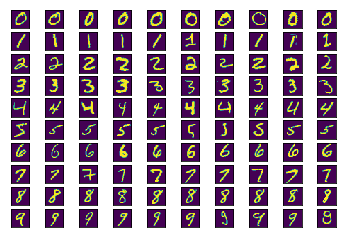

In [7]:
#Showing the images in different categories
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, ax = plt.subplots(10, 10)
#fig.subplots_adjust(hspace=0.2, wspace=0.2)

#grid = ImageGrid(fig, 111, nrows_ncols=(10, 10), axes_pad=0.5)
label_img_index_map = {}
for label in labels:
    count = 0
    for i in range(0, len(train_set)):
        if label == train_label[i]:
            ax[label, count].imshow(train_set[i])
            ax[label, count].set_xticks([])
            ax[label, count].set_yticks([])
            count += 1
        if count == 10:
            break
plt.show()            

In [15]:
#Building a baseline model
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [16]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [19]:
history = model.fit(new_train_set, one_hot_train_label, validation_split=0.2, epochs=20, batch_size=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s - loss: 3.9937 - acc: 0.7510 - val_loss: 3.0804 - val_acc: 0.8074
Epoch 2/20
48000/48000 [==============================] - 3s - loss: 3.0592 - acc: 0.8089 - val_loss: 2.9656 - val_acc: 0.8145
Epoch 3/20
48000/48000 [==============================] - 2s - loss: 2.8851 - acc: 0.8198 - val_loss: 2.7779 - val_acc: 0.8266
Epoch 4/20
48000/48000 [==============================] - 2s - loss: 2.7874 - acc: 0.8259 - val_loss: 2.7654 - val_acc: 0.8271
Epoch 5/20
48000/48000 [==============================] - 2s - loss: 2.6862 - acc: 0.8324 - val_loss: 2.8374 - val_acc: 0.8224
Epoch 6/20
48000/48000 [==============================] - 2s - loss: 2.7807 - acc: 0.8264 - val_loss: 2.6371 - val_acc: 0.8357
Epoch 7/20
48000/48000 [==============================] - 3s - loss: 2.7047 - acc: 0.8313 - val_loss: 2.7051 - val_acc: 0.8306
Epoch 8/20
48000/48000 [==============================] - 3s 

In [21]:
score = model.evaluate(new_test_set, one_hot_test_label, batch_size=50)
print(score)

 9650/10000 [===========================>..] - ETA: 0s[2.4226464107632637, 0.84939999520778653]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


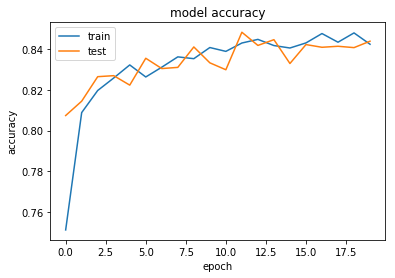

In [22]:
#Plotting the accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

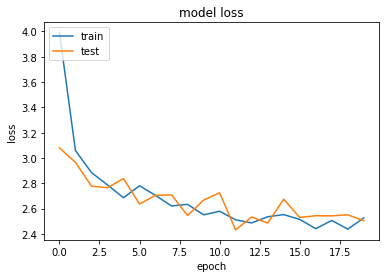

In [23]:
#plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
#Building a deeper model
model = keras.models.Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
#Initializing the optimizer
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [10]:
history = model.fit(new_train_set, one_hot_train_label, validation_split=0.2, epochs=20, batch_size=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 45s - loss: 0.5730 - acc: 0.8749 - val_loss: 0.1351 - val_acc: 0.9589
Epoch 2/20
48000/48000 [==============================] - 36s - loss: 0.1166 - acc: 0.9641 - val_loss: 0.0865 - val_acc: 0.9739
Epoch 3/20
48000/48000 [==============================] - 39s - loss: 0.0772 - acc: 0.9760 - val_loss: 0.0763 - val_acc: 0.9771
Epoch 4/20
48000/48000 [==============================] - 36s - loss: 0.0651 - acc: 0.9795 - val_loss: 0.0889 - val_acc: 0.9740
Epoch 5/20
48000/48000 [==============================] - 37s - loss: 0.0508 - acc: 0.9838 - val_loss: 0.0745 - val_acc: 0.9795
Epoch 6/20
48000/48000 [==============================] - 39s - loss: 0.0446 - acc: 0.9859 - val_loss: 0.0733 - val_acc: 0.9793
Epoch 7/20
48000/48000 [==============================] - 39s - loss: 0.0409 - acc: 0.9867 - val_loss: 0.0730 - val_acc: 0.9823
Epoch 8/20
48000/48000 [==============================

In [11]:
score = model.evaluate(new_test_set, one_hot_test_label, batch_size=50)
print(score)

 9900/10000 [============================>.] - ETA: 0s[0.12106596276876792, 0.97900000244379048]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


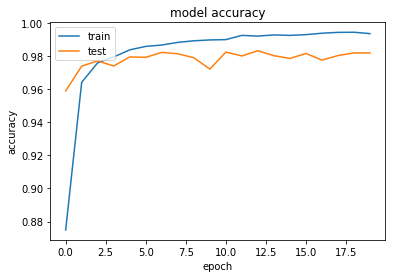

In [15]:
#Plotting the accuracy values
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

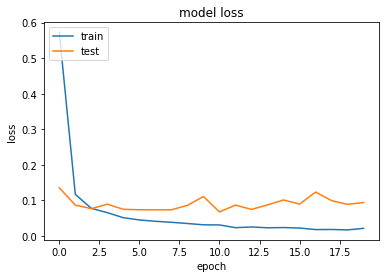

In [16]:
#plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Below I have implemented the LeNet - the architecture taken from the paper Gradient-Based Learning Applied To Document Learning. 

In [17]:
#Padding the image
padded_train_set = np.pad(new_train_set, ((0,0), (2,2), (2,2), (0,0)), 'constant')
padded_test_set = np.pad(new_test_set, ((0,0),(2,2),(2,2),(0,0)), 'constant')
print(padded_train_set.shape)
print(padded_test_set.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [18]:
model = keras.models.Sequential()
model.add(Conv2D(6, (5,5), input_shape=(32,32,1)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (5,5)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('sigmoid'))
model.add(Dense(84))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
__________

In [20]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(padded_train_set, one_hot_train_label, validation_split= 0.2, epochs=20, batch_size=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 30s - loss: 0.0486 - acc: 0.6158 - val_loss: 0.0099 - val_acc: 0.9414
Epoch 2/20
48000/48000 [==============================] - 28s - loss: 0.0079 - acc: 0.9513 - val_loss: 0.0058 - val_acc: 0.9627
Epoch 3/20
48000/48000 [==============================] - 29s - loss: 0.0053 - acc: 0.9673 - val_loss: 0.0047 - val_acc: 0.9710
Epoch 4/20
48000/48000 [==============================] - 30s - loss: 0.0042 - acc: 0.9741 - val_loss: 0.0036 - val_acc: 0.9772
Epoch 5/20
48000/48000 [==============================] - 32s - loss: 0.0036 - acc: 0.9771 - val_loss: 0.0037 - val_acc: 0.9773
Epoch 6/20
48000/48000 [==============================] - 26s - loss: 0.0032 - acc: 0.9799 - val_loss: 0.0032 - val_acc: 0.9803
Epoch 7/20
48000/48000 [==============================] - 25s - loss: 0.0028 - acc: 0.9820 - val_loss: 0.0030 - val_acc: 0.9814
Epoch 8/20
48000/48000 [==============================

In [24]:
score = model.evaluate(padded_test_set, one_hot_test_label, batch_size=50)
print(score)

 9900/10000 [============================>.] - ETA: 0s[0.002150884813901932, 0.98630000352859493]


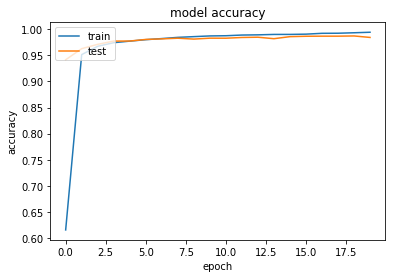

In [25]:
#Plotting the accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

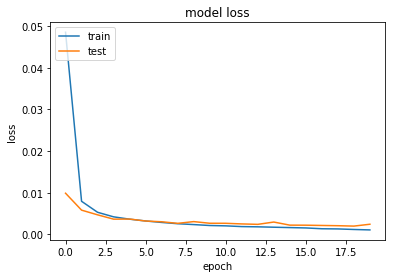

In [26]:
#plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Below I have visualized what happens to a cat image as it passes through the neural network.

In [27]:
#This function returns the image after it is passed through the model
def visualizeConvs(image, model):
    batch_image = np.expand_dims(image, axis=0)  
    conv_image = model.predict(batch_image)
    new_image = np.squeeze(conv_image, axis=0)
    new_image = new_image.astype('uint8')
    return new_image

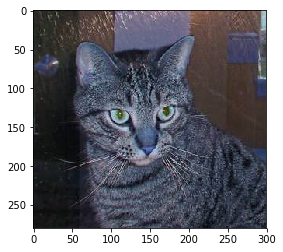

In [30]:
import cv2
#Original Image
cat = cv2.imread('cat.jpg')
plt.imshow(cat)
plt.show()

(278, 298, 3)


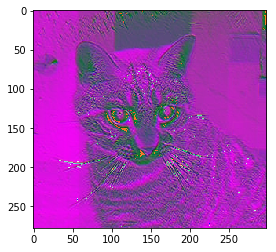

In [35]:
#The image after passing a 3x3 kernel with 3 feature maps - You see a nosiy cat 
model = keras.models.Sequential()
model.add(Conv2D(3, (3, 3), input_shape=cat.shape))
new_image = visualizeConvs(cat, model)
print(new_image.shape)
plt.imshow(new_image)
plt.show()

(271, 291, 3)


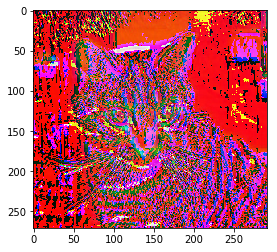

In [36]:
#The image after passing a 10x10 kernel with 3 feature maps - You see a nosiy cat 
model = keras.models.Sequential()
model.add(Conv2D(3, (10, 10), input_shape=cat.shape))
new_image = visualizeConvs(cat, model)
print(new_image.shape)
plt.imshow(new_image)
plt.show()

(271, 291, 32)


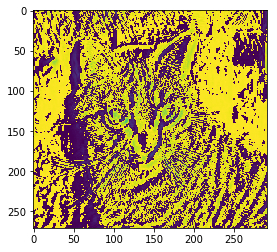

In [37]:
#The image after passing a 10x10 kernel with 32 feature maps - You see a nosiy cat 
model = keras.models.Sequential()
model.add(Conv2D(32, (10, 10), input_shape=cat.shape))
new_image = visualizeConvs(cat, model)
print(new_image.shape)
plt.imshow(new_image[:,:,0])
plt.show()

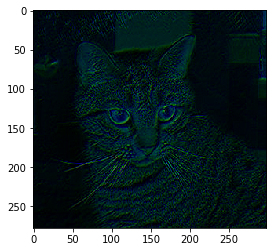

In [38]:
#The image after 1 conv layer and passing through the a relu function i.e squishing it. 
# Important details of the image are captured like the eyes
model = keras.models.Sequential()
model.add(Conv2D(3, (3, 3), input_shape=cat.shape))
model.add(Activation('relu'))
new_image = visualizeConvs(cat, model)
plt.imshow(new_image)
plt.show()

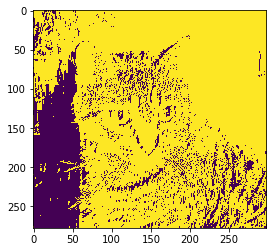

In [39]:
#When you use a sigmoid activation function
model = keras.models.Sequential()
model.add(Conv2D(3, (3, 3), input_shape=cat.shape))
model.add(Activation('sigmoid'))
new_image = visualizeConvs(cat, model)
plt.imshow(new_image[:,:,0])
plt.show()

(139, 149, 3)


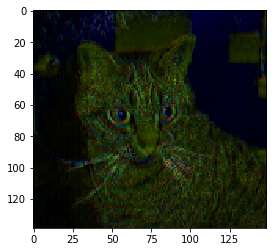

In [51]:
#After applying pooling - The image is smaller - reduced to half the size
model = keras.models.Sequential()
model.add(Conv2D(3, (3, 3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
new_image = visualizeConvs(cat, model)
print(new_image.shape)
plt.imshow(new_image)
plt.show()

(68, 73, 3)


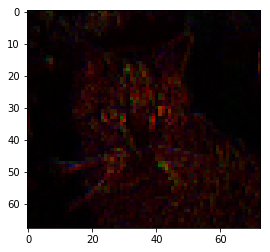

In [52]:
#When you have 2 Convolutional layers
model = keras.models.Sequential()
model.add(Conv2D(3, (3, 3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(3, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
new_image = visualizeConvs(cat, model)
print(new_image.shape)
plt.imshow(new_image)
plt.show()

(33, 35, 16)


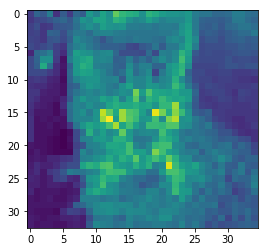

In [53]:
#When you have 3 convolutional images
model = keras.models.Sequential()
model.add(Conv2D(64, (3, 3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
new_image = visualizeConvs(cat, model)
print(new_image.shape)
plt.imshow(new_image[:,:,0])
plt.show()

(15, 16, 3)


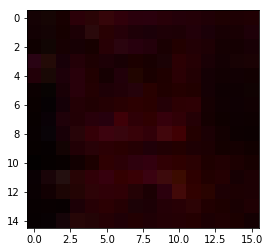

In [54]:
#When you have 4 convolutional images
model = keras.models.Sequential()
model.add(Conv2D(64, (3, 3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(3, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
new_image = visualizeConvs(cat, model)
print(new_image.shape)
plt.imshow(new_image)
plt.show()

Below I have used a different dataset - the cats vs dogs dataset to train a deep neural network. 

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
# Configure random transformations, normalizations and data augmentation - for more details on this read the documentation.
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1.0/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

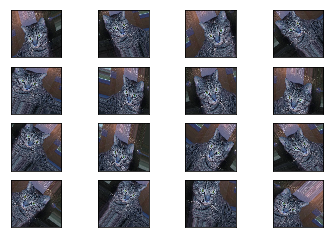

In [50]:
# Data Agumentation
import cv2

image = cv2.imread('cat.jpg')
image = np.expand_dims(image, axis=0)
fig, ax = plt.subplots(4, 4)
i = 0
j = 0
for each in datagen.flow(image, batch_size=1,  save_prefix='cat', save_format='jpeg'):
    each = each.reshape((280, 300, 3))
    ax[i, j].imshow(each)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    if j == 3:
        i+=1
        j = 0
    else:
        j += 1
    if i == 4:
        break

plt.show()        

In [52]:
#Model for cat vs dog classification
model = keras.models.Sequential()
model.add(Conv2D(32, (3,3), input_shape=(200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # For Overfitting
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
__________

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
train_generator = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_data = train_generator.flow_from_directory('../../1000/train',
                                                target_size=(200, 200),
                                                batch_size=50,
                                                class_mode='binary')

validation_generator = ImageDataGenerator(rescale=1.0/255)

validation_data = validation_generator.flow_from_directory('../../1000/validation',
                                                          target_size=(200, 200),
                                                          batch_size=50,
                                                          class_mode='binary')

history = model.fit_generator(train_data, steps_per_epoch=2000//50, epochs=10, validation_data = validation_data, validation_steps = 500//50)

Found 2002 images belonging to 2 classes.
Found 502 images belonging to 2 classes.
Epoch 1/10
40/40 [==============================] - 251s - loss: 0.4962 - acc: 0.7665 - val_loss: 0.5120 - val_acc: 0.7380
Epoch 2/10
40/40 [==============================] - 224s - loss: 0.4665 - acc: 0.7799 - val_loss: 0.5146 - val_acc: 0.7412
Epoch 3/10
40/40 [==============================] - 243s - loss: 0.4960 - acc: 0.7552 - val_loss: 0.4639 - val_acc: 0.7633
Epoch 4/10
40/40 [==============================] - 224s - loss: 0.4518 - acc: 0.7864 - val_loss: 0.4580 - val_acc: 0.7699
Epoch 5/10
40/40 [==============================] - 221s - loss: 0.4719 - acc: 0.7729 - val_loss: 0.4947 - val_acc: 0.7544
Epoch 6/10
40/40 [==============================] - 216s - loss: 0.4252 - acc: 0.8024 - val_loss: 0.5049 - val_acc: 0.7478
Epoch 7/10
40/40 [==============================] - 214s - loss: 0.4247 - acc: 0.8099 - val_loss: 0.4991 - val_acc: 0.7810
Epoch 8/10
40/40 [==============================] - 194s

In [64]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


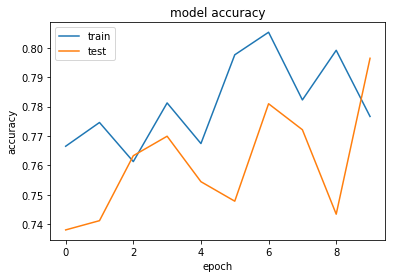

In [65]:
#Plotting the accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

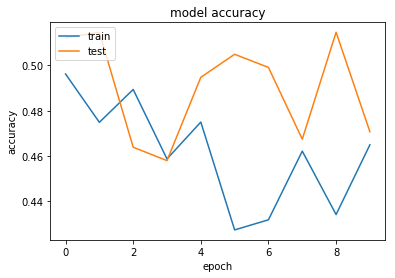

In [66]:
#Plotting the accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()